### 1️⃣ Import packages


In [1]:
import pandas as pd
import numpy as np
import janitor
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### 2️⃣ Import datasets


In [2]:
app_data = pd.read_csv('googleplaystore.csv')
user_reviews = pd.read_csv('googleplaystore_user_reviews.csv')

### 3️⃣ Preview datasets


In [3]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
app_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### 4️⃣ Clean column names


In [7]:
app_data = app_data.clean_names()
app_data.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
user_reviews = user_reviews.clean_names()
user_reviews.head()

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### 5️⃣ Preview the data some more

Check for:

- Number of unique observations
- Number of total observations
- Missing values


In [9]:
app_data['app'].nunique()

9660

In [10]:
len(app_data)

10841

In [11]:
app_data.isna().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

In [12]:
user_reviews['app'].nunique()

1074

In [13]:
len(user_reviews)

64295

In [14]:
user_reviews.isna().sum()

app                           0
translated_review         26868
sentiment                 26863
sentiment_polarity        26863
sentiment_subjectivity    26863
dtype: int64

### 6️⃣ Handle duplicates

Explore and remove duplicate rows


In [15]:
app_data.duplicated().sum()

np.int64(483)

In [16]:
app_data['app'].duplicated().sum()

np.int64(1181)

In [17]:
app_data['app'].nunique()

9660

In [18]:
app_data = app_data.drop_duplicates()
len(app_data)

10358

Hmmm... 9660 vs. 10358? Something's not adding up. Let's REALLY remove all the duplicates (compare everything except the `reviews` column).


In [19]:
app_data[app_data['app']=='Google Photos']

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,"August 1, 2018",Varies with device,Varies with device


In [20]:
app_data["last_updated"] = pd.to_datetime(app_data["last_updated"], errors="coerce")
app_data["reviews"] = pd.to_numeric(app_data["reviews"], errors="coerce")

# Sort by last_updated (descending) then reviews (descending) to keep the latest & most reviewed
app_data = app_data.sort_values(by=["last_updated", "reviews"], ascending=[False, False])

# Drop duplicates using all columns except 'reviews'
app_data = app_data.groupby("app").first().reset_index()

In [21]:
app_data['app'].nunique()

9660

In [22]:
len(app_data)

9660

In [23]:
app_data[app_data['app']=='Google Photos']

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
4937,Google Photos,PHOTOGRAPHY,4.5,10859051.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Photography,2018-08-06,Varies with device,Varies with device


Looks like we've successfully removed unnecessary rows! Let's do the same for `user_reviews`.


In [24]:
user_reviews = user_reviews.drop_duplicates()
len(user_reviews)

30679

In [25]:
app_data.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27.0,3.6M,500+,Free,0,Everyone,Sports,2017-10-07,0.22,4.1 and up
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22M,"1,000,000+",Free,0,Everyone,Social,2018-08-02,5.03,4.1 and up
2,- Free Comics - Comic Apps,COMICS,3.5,115.0,9.1M,"10,000+",Free,0,Mature 17+,Comics,2018-07-13,5.0.12,5.0 and up
3,.R,TOOLS,4.5,259.0,203k,"10,000+",Free,0,Everyone,Tools,2014-09-16,1.1.06,1.5 and up
4,/u/app,COMMUNICATION,4.7,573.0,53M,"10,000+",Free,0,Mature 17+,Communication,2018-07-03,4.2.4,4.1 and up


### 7️⃣ Check and fix data types, if necessary


In [26]:
app_data.dtypes

app                       object
category                  object
rating                   float64
reviews                  float64
size                      object
installs                  object
type                      object
price                     object
content_rating            object
genres                    object
last_updated      datetime64[ns]
current_ver               object
android_ver               object
dtype: object

In [27]:
last_updated_parsed = pd.to_datetime(app_data['last_updated'], errors='coerce')
app_data[last_updated_parsed.isna()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
5806,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",Free,0,Everyone,None,"February 11, 2018",NaT,4.0 and up,None


In [28]:
failed_row_index = last_updated_parsed.isna()
failed_row_index

0       False
1       False
2       False
3       False
4       False
        ...  
9655    False
9656    False
9657    False
9658    False
9659    False
Name: last_updated, Length: 9660, dtype: bool

In [29]:
failed_row = app_data.loc[failed_row_index].iloc[0]
failed_row

app               Life Made WI-Fi Touchscreen Photo Frame
category                                              1.9
rating                                               19.0
reviews                                               NaN
size                                               1,000+
installs                                             Free
type                                                    0
price                                            Everyone
content_rating                                       None
genres                                  February 11, 2018
last_updated                                          NaT
current_ver                                    4.0 and up
android_ver                                          None
Name: 5806, dtype: object

In [30]:
app_data = app_data.astype(str)

# Manually shift values (starting from rightmost column)
for i in range(12, 1, -1):
    app_data.at[failed_row.name, app_data.columns[i]] = failed_row.iloc[i - 1]

# Put NA value for 'category' in problem row
app_data.at[failed_row.name, 'category'] = np.nan

In [31]:
# Checked in the problem row was fixed
app_data.loc[failed_row.name]

app               Life Made WI-Fi Touchscreen Photo Frame
category                                              NaN
rating                                                1.9
reviews                                              19.0
size                                                  NaN
installs                                           1,000+
type                                                 Free
price                                                   0
content_rating                                   Everyone
genres                                               None
last_updated                            February 11, 2018
current_ver                                           NaT
android_ver                                    4.0 and up
Name: 5806, dtype: object

In [32]:
app_data.dtypes

app               object
category          object
rating            object
reviews           object
size              object
installs          object
type              object
price             object
content_rating    object
genres            object
last_updated      object
current_ver       object
android_ver       object
dtype: object

In [33]:
# Convert data types for 'rating', 'reviews', 'installs', and 'last_updated'
app_data['rating'] = app_data['rating'].astype(float)

app_data['reviews'] = app_data['reviews'].astype(float).astype(int)

app_data['installs'] = (
  app_data['installs']
  .str.replace('[+,]', '', regex=True)
  .fillna(0)  # Replace NaN with 0
  .astype(int)
)

app_data['price'] = (
  app_data['price']
  .str.replace('$', '', regex=False)
  .astype(float)
)

app_data['last_updated'] = pd.to_datetime(app_data['last_updated'], format='mixed')

In [34]:
# Define a function to convert the 'size' column into bytes
def size_to_bytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

In [35]:
# Apply function to 'size' column + change column name for clarity
app_data['size'] = app_data['size'].apply(size_to_bytes)
app_data.rename(columns={'size': 'size_bytes'}, inplace=True)
app_data.head()

,app,category,rating,reviews,size_bytes,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3774873.6,500,Free,0.0,Everyone,Sports,2017-10-07,0.22,4.1 and up
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,23068672.0,1000000,Free,0.0,Everyone,Social,2018-08-02,5.03,4.1 and up
2,- Free Comics - Comic Apps,COMICS,3.5,115,9542041.6,10000,Free,0.0,Mature 17+,Comics,2018-07-13,5.0.12,5.0 and up
3,.R,TOOLS,4.5,259,207872.0,10000,Free,0.0,Everyone,Tools,2014-09-16,1.1.06,1.5 and up
4,/u/app,COMMUNICATION,4.7,573,55574528.0,10000,Free,0.0,Mature 17+,Communication,2018-07-03,4.2.4,4.1 and up


In [36]:
app_data.dtypes

app                       object
category                  object
rating                   float64
reviews                    int64
size_bytes               float64
installs                   int64
type                      object
price                    float64
content_rating            object
genres                    object
last_updated      datetime64[ns]
current_ver               object
android_ver               object
dtype: object

#### ‼️ Save those cleaned datasets!!


In [37]:
app_data.to_csv('app_data_cleaned.csv', index=False)
user_reviews.to_csv('user_reviews_cleaned.csv', index=False)

### 8️⃣ Merge datasets

🏆 Top 10 Apps

- Identify the top 10 apps as far as number of installs, ratings, and reviews
- Examine key features, such as `category`, `price`, `installs`, and `rating`, for common patterns
- Analyze user reviews


In [38]:
top_10_apps = (
  app_data
  .sort_values(by=['installs', 'rating', 'reviews'], ascending=[False, False, False])
  .head(10)
)
top_10_apps

,app,category,rating,reviews,size_bytes,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
5399,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
8080,Subway Surfers,GAME,4.5,27725352,79691776.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
4937,Google Photos,PHOTOGRAPHY,4.5,10859051,NaN,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device
9042,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
4912,Google,TOOLS,4.4,8033493,NaN,1000000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device
4924,Google Drive,PRODUCTIVITY,4.4,2731211,NaN,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device
9226,YouTube,VIDEO_PLAYERS,4.3,25655305,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device
4921,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
6051,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235373,NaN,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device
4939,Google Play Games,FAMILY,4.3,7168735,NaN,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device


In [39]:
top_reviews = top_10_apps.merge(user_reviews, on='app', how='left')
top_reviews.head()

,app,category,rating,reviews,size_bytes,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
0,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,NaN,NaN,NaN,NaN
1,Subway Surfers,GAME,4.5,27725352,79691776.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,NaN,NaN,NaN,NaN
2,Google Photos,PHOTOGRAPHY,4.5,10859051,NaN,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,NaN,NaN,NaN,NaN
3,Google Photos,PHOTOGRAPHY,4.5,10859051,NaN,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Out photo I've used I enjoy features most. The...,Positive,0.231006,0.408442
4,Google Photos,PHOTOGRAPHY,4.5,10859051,NaN,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,"I installed ""Google Photos"" IOS devices Samsun...",Positive,0.125000,0.300000


In [40]:
sentiment_counts = top_reviews.groupby(['app', 'sentiment']).size().unstack(fill_value=0)
sentiment_counts

sentiment,Negative,Neutral,Positive
app,,,
Google,3,7,28
Google Photos,24,1,76


In [41]:
sentiment_stats = top_reviews.groupby('app')[['sentiment_polarity', 'sentiment_subjectivity']].mean()
sentiment_stats

,sentiment_polarity,sentiment_subjectivity
app,,
Google,0.260359,0.492744
Google Chrome: Fast & Secure,NaN,NaN
Google Drive,NaN,NaN
Google Photos,0.187021,0.509305
Google Play Games,NaN,NaN
Instagram,NaN,NaN
Maps - Navigate & Explore,NaN,NaN
Subway Surfers,NaN,NaN
WhatsApp Messenger,NaN,NaN


In [42]:
user_reviews.groupby(['app', 'sentiment']).size().unstack(fill_value=0)

sentiment,Negative,Neutral,Positive
app,,,
10 Best Foods for You,5,11,79
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1,8,27
11st,7,10,23
1800 Contacts - Lens Store,3,5,32
1LINE – One Line with One Touch,8,3,27
...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,12,5,22
Hotspot Shield Free VPN Proxy & Wi-Fi Security,3,14,15
Hotstar,14,4,14


### 9️⃣ Visualize data


#### ❓ App Ratings - Do higher ratings correlate with more installs?


In [43]:
# See if higher-rated apps tend to have more installs
rating_installs = app_data.groupby('rating').agg({'installs':'sum'}).reset_index()
px.bar(rating_installs, 
       x='rating', 
       y='installs', 
       title='Total Installs by Rating')

#### ❓ Number of Reviews - Does user feedback impact an app's rating?


In [44]:
px.scatter(app_data, 
           x="rating", 
           y="reviews", 
           title="Number of Reviews vs. App Rating")

#### ❓ Category - Which app categories tend to be more successful?


In [45]:
app_data['category'].unique()

array(['SPORTS', 'SOCIAL', 'COMICS', 'TOOLS', 'COMMUNICATION',
       'NEWS_AND_MAGAZINES', 'HEALTH_AND_FITNESS', 'FAMILY',
       'BOOKS_AND_REFERENCE', 'LIFESTYLE', 'BUSINESS', 'SHOPPING',
       'MEDICAL', 'GAME', 'FINANCE', 'PERSONALIZATION', 'PHOTOGRAPHY',
       'TRAVEL_AND_LOCAL', 'DATING', 'PRODUCTIVITY', 'ART_AND_DESIGN',
       'FOOD_AND_DRINK', 'VIDEO_PLAYERS', 'HOUSE_AND_HOME',
       'MAPS_AND_NAVIGATION', 'EVENTS', 'EDUCATION', 'AUTO_AND_VEHICLES',
       'WEATHER', 'BEAUTY', 'ENTERTAINMENT', 'LIBRARIES_AND_DEMO',
       'PARENTING', nan], dtype=object)

In [46]:
category_installs = app_data.groupby('category').agg({'installs':'sum'}).reset_index()
px.bar(category_installs, 
       x='category', 
       y='installs',
       title='Total Installs by App Category')

In [47]:
category_installs = app_data.groupby('category').agg({'installs':'mean'}).reset_index()
px.bar(category_installs, 
       x='category', 
       y='installs',
       title='Average Installs by App Category')

#### ❓ Price (Free vs. Paid) - Do free apps perform better than paid apps?


In [48]:
price_installs = app_data.groupby('type').agg({'installs':'sum'}).reset_index()
px.bar(price_installs, x='type', y='installs')

In [49]:
price_installs

,type,installs
0,Free,75261073646
1,None,0
2,Paid,57363781


In [50]:
app_data['type'].value_counts()

type
Free    8905
Paid     754
None       1
Name: count, dtype: int64

In [51]:
top_free_apps = app_data[app_data['type']=='Free'].nlargest(10, 'installs')
top_free_apps

,app,category,rating,reviews,size_bytes,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
4328,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
4869,Gmail,COMMUNICATION,4.3,4604483,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
4912,Google,TOOLS,4.4,8033493,NaN,1000000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device
4921,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
4924,Google Drive,PRODUCTIVITY,4.4,2731211,NaN,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device
4933,Google News,NEWS_AND_MAGAZINES,3.9,878065,13631488.0,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up
4937,Google Photos,PHOTOGRAPHY,4.5,10859051,NaN,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device
4938,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
4939,Google Play Games,FAMILY,4.3,7168735,NaN,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device
4940,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-06,Varies with device,Varies with device


In [52]:
top_paid_apps = app_data[app_data['type']=='Paid'].nlargest(10, 'installs')
top_paid_apps

,app,category,rating,reviews,size_bytes,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
5197,Hitman Sniper,GAME,4.6,408292,30408704.0,10000000,Paid,0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up
6212,Minecraft,FAMILY,4.5,2376564,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device
1508,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14680064.0,1000000,Paid,2.49,Everyone,Personalization,2016-08-24,5.7.8,2.3 and up
1695,Bloons TD 5,FAMILY,4.6,190086,98566144.0,1000000,Paid,2.99,Everyone,Strategy,2018-07-13,3.16,2.3.3 and up
2393,Card Wars - Adventure Time,FAMILY,4.3,129603,24117248.0,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,2016-02-11,1.11.0,2.3.3 and up
2772,Cut the Rope GOLD,FAMILY,4.6,61264,45088768.0,1000000,Paid,0.99,Everyone,Puzzle,2018-06-19,3.7.0,4.1 and up
3432,DraStic DS Emulator,GAME,4.6,87766,12582912.0,1000000,Paid,4.99,Everyone,Action,2016-07-19,r2.5.0.3a,2.3 and up
4337,Facetune - For Free,PHOTOGRAPHY,4.4,49553,50331648.0,1000000,Paid,5.99,Everyone,Photography,2018-07-25,1.3.1,4.1 and up
4484,Five Nights at Freddy's,GAME,4.6,100805,52428800.0,1000000,Paid,2.99,Teen,Action,2014-12-02,1.85,2.3 and up
4690,Fruit Ninja Classic,GAME,4.3,85468,37748736.0,1000000,Paid,0.99,Everyone,Arcade,2018-06-08,2.4.1.485300,4.0.3 and up


In [53]:
top_10_apps_per_type = pd.concat([top_free_apps, top_paid_apps])

In [54]:
top_10_type_installs = top_10_apps_per_type.groupby('type').agg({'installs':'sum'}).reset_index()
px.bar(top_10_type_installs, x='type', y='installs')

In [55]:
fig = px.box(app_data,
       x='type',
       y='rating',
       title='Ratings Distibution: Free vs. Paid Apps')
fig.update_layout(height=600)
fig.show()

In [56]:
fig = px.box(app_data,
       x='type',
       y='installs',
       title='Installs Distibution: Free vs. Paid Apps')
fig.update_layout(height=600, yaxis_type='log')
fig.show()

In [57]:
# Filter for paid apps
paid_apps = app_data[app_data['price'] > 0][['app', 'rating', 'installs', 'price']].copy()

# Categorize price into bins
price_bins = [0, 2, 5, 10, 20, 50, 100, 400]
price_labels = ["$0-2", "$2-5", "$5-10", "$10-20", "$20-50", "$50-100", "$100+"]
paid_apps['price_range'] = pd.cut(paid_apps['price'], bins=price_bins, labels=price_labels)

In [58]:
avg_rating_by_price = paid_apps.groupby('price_range', observed=True).agg({'rating':'mean'}).reset_index()

px.bar(avg_rating_by_price,
       x='price_range',
       y='rating',
       title='Average Ratings for Paid Apps by Price Range',
       labels={'price_range': 'Price Range (USD)', 'rating': 'Average Rating'})

In [59]:
installs_by_price = paid_apps.groupby('price_range', observed=True).agg({'installs':'sum'}).reset_index()

px.bar(installs_by_price,
       x='price_range',
       y='installs',
       title='Installs for Paid Apps by Price Range')

In [60]:
avg_installs_by_price = paid_apps.groupby('price_range', observed=True).agg({'installs':'mean'}).reset_index()

px.bar(avg_installs_by_price,
       x='price_range',
       y='installs',
       title='Average Installs for Paid Apps by Price Range')

### 📊 Average Rating per Category, Faceted by Content Rating

Compare app ratings within different age groups.


In [61]:
avg_ratings = app_data.groupby(['category', 'content_rating']).agg({'rating': 'mean'}).reset_index()
px.bar(avg_ratings, 
       x='category', 
       y='rating', 
       facet_col='content_rating', 
       title='Average Rating by Category and Content Rating', 
       height=700)

#### ❓ Is there any correlation between the app data numeric values?


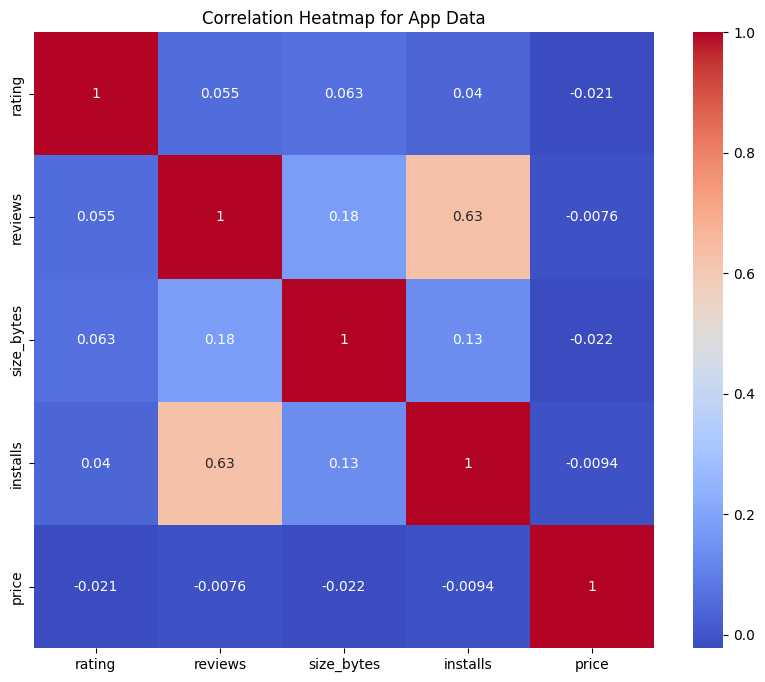

In [62]:
numeric_app_data = app_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_app_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for App Data")
plt.show()